In [1]:
! wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2023-03-01 17:00:01--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  1.21MB/s    in 10s     

2023-03-01 17:00:12 (1.23 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [2]:
! unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [10]:
# import modules
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('jena_climate_2009_2016.csv')

df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [11]:
time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
time.head()

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
Name: Date Time, dtype: datetime64[ns]

In [12]:
series = df['T (degC)']
series.index = time 

df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


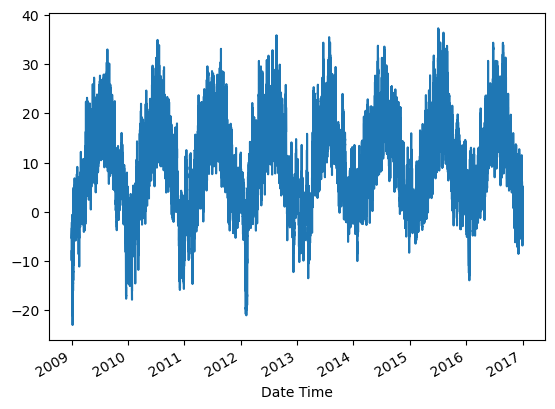

In [13]:
series.plot()
plt.show()

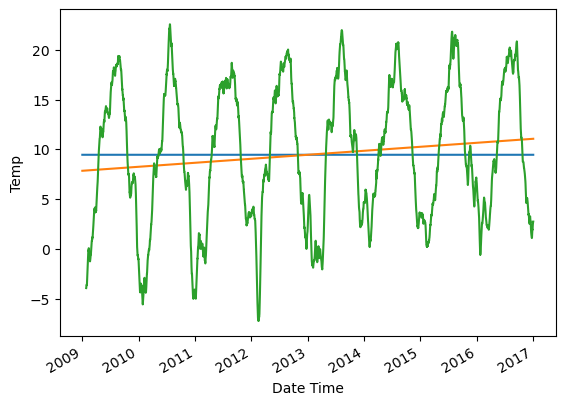

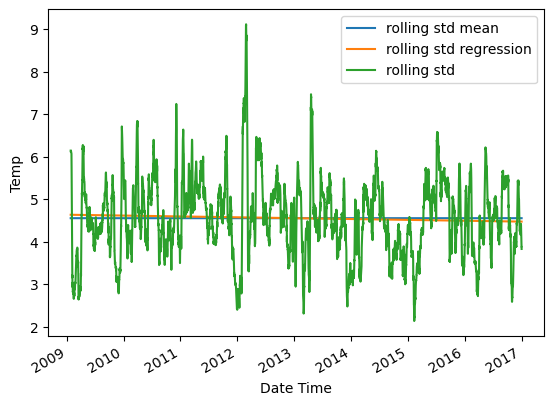

In [14]:
import numpy as np

plt.plot(series.index, np.array([series.mean()] * len(series)))

x = np.arange(len(series))
y = series.values 
m, c = np.polyfit(x, y, 1)

plt.plot(series.index, m*x+c)

series.rolling(3600).mean().plot()
plt.ylabel('Temp')
plt.show() 

roll_std = series.rolling(3600).std()
roll_std.dropna(inplace=True)
plt.plot(roll_std.index, np.array([roll_std.mean()] * len(roll_std)))

x = np.arange(len(roll_std))
y = roll_std.values 
m, c = np.polyfit(x, y, 1)
plt.plot(roll_std.index, m*x+c)

roll_std.plot()
plt.legend(['rolling std mean', 'rolling std regression', 
            'rolling std'])
plt.ylabel('Temp')
plt.show()

The temperature values have an upward trend and there is strong seasonality in the data. The rolling standard deviation has a very weak downward trend, but the rolling standard deviation values themselves vary a lot.

# Autocorrelation

Correlation let us compare the relationship between two variables by assuming a Gaussian distribution, and using `Pearson's coefficient` to find the strength of the relationship between said variables.

The `Pearsian coeffient` can be calculated as below

In [15]:
def correlation(x, y):
    x_norm = x - x.mean()
    y_norm = y - y.mean()

    return np.sum(x_norm * y_norm) / np.sqrt(np.sum(x_norm**2) * np.sum(y_norm**2))

`Autocorrelation` is the correlation of a signal with a delayed copy of itself as a function of delay. we try to find the correlationship between a time series and a time lagged version of itself. we match these values, and find how they vary as we increase the time lag.

In [16]:
def autocorrelation(x, k):
    val_0 = np.sum((x - x.mean()) ** 2) / len(x)
    val_k = np.sum((x[:k] - x.mean()) * (x[k:] - x.mean())) / len(x)
    return val_k / val_0

# Partial autocorrelation

the partial autocorrelation function let us calculate partial correlation between a time series and the same series with a time lag. The difference between correlation and partial correlation is that partial correlation let us control the effect of other lag values

the aim is to calculate the dependece of the same time series with different delays

to find the dependence of all log values with each other, we can formulate a linear equation of the following nature. let `X(t - k)` be a column vector of a time series with `lag k`. our matrix generated above with then create an array of shape `(X x k)`. let call it `A`. now define another matrix with unknown coefficient `B`, which is of the same size as `X`.

then we have a linear system of equation

`X(t) = A x B`

and we need to solve for `B`

for lag values of 1 or 2 this is analytically simple to solve. That being said, it can get cumbersome pretty quickly.

Another way of approaching the problem is provided by the `Yule Walker Equation`. An element of a time series is represented as a linear equation dependent on each of its previous elements until the maximum lag values.

the equation is multipled by the element at the maximum lagged time step and the expectation is calculated. the equation is divided by the length of the series, then by zeroth autocovariance.

here, `c(i)` is the autocovariance value (which is divided by the zeroth value to get autocorrelation parameter `r(p)`)

In [17]:
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


/home/mike/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


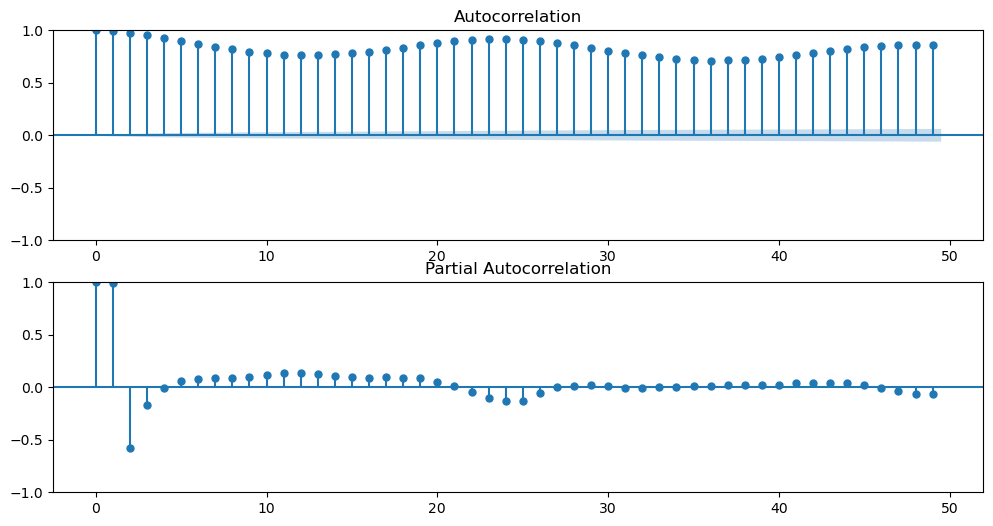

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

def get_acf_pacf_plots(df):
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df, ax=ax[0])
    ax[1] = plot_pacf(df, ax=ax[1])

get_acf_pacf_plots(series[5::6])
plt.show()

# Seasonality 

the data has a seasonal element to it. we know intuitively that the temperature data should have a seasonal component to it as well. the temperate should oscillate every day, lower during the nights compared to during the days. besides this, they should also oscillate over the course of a year 

to validate these suspicious, we can look at the Fourier transforms of the series

Fourier transform allow us to make an amplitude-based series into a frequency-based series. they are complex valued functions that represent every series as a superposition of sinusoidal waves in a complex plane.



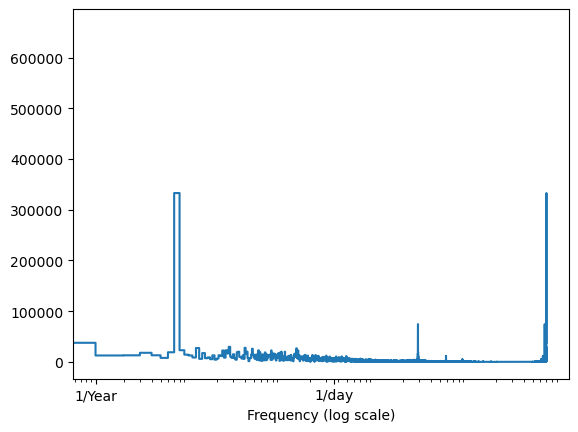

In [19]:
from scipy.fft import fft 

fft_vals = fft(series[5::6].values)
f_per_dataset = np.arange(0, len(fft_vals))

n_samples_h = len(series[5::6])

hours_per_year = 24 * 365.2524
years_per_dataset = n_samples_h / hours_per_year 

f_per_year = f_per_dataset / years_per_dataset 
plt.step(f_per_dataset, np.abs(fft_vals))
plt.xscale('log')
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

the values around 1/year and 1/day shown an unusual spike, validating our intuitions

the above method is a basic form of spectral analysis. a lot of sophisticated method for spectral density estimation have emerged which utilize the underlying idea of Fourier transforms: converting time domain informaiton into the frequency domain. some of them are `Periodgrams`, `Barlett's method`, `Welch's method` etc. often, to obtain better results, window functions like `Hamming` and `Blackman-Harris` are used to smooth the time series. You can think of these as 1-dimensional convolutional filters, where the parameters vary accoding to the kind of window function we are looking at. You can learn mode about spectral analysis and Fourier transforms by reading up an digital signal processing.

# Stationary of a time series 

a time series is stationary when its statistical properties like mean, variance, and autocorrelation don't change oevr time. 

method like ARIMA and its variant work with the assumption that the time series they are modeling is stationary. If the time series is not stationary, these methods dont work very well.

there are several tests we can dot o determine if a time series is stationary. even luckier for us, there are several transformations to convert a non-stationary time series to a stationary one and back



# ACF and PACF plots 

looking at how the mean and variance of a time series changes over time can give us an initial idea of how non-stationary a time series is, and what kind of stationarizing mechanism can we apply. Looking at the plots we found above, we can guesss that the weather time series is far from stationary. we can also look at the ACF and PACF plots. if the values on the plots fall quickly, changes are that the time series is close to stationary. but the ACF and PACF plots we got above were looking at values to close in time. the weather hardly changes every 10 minutes. let take a look at the plot when take data by the day

/home/mike/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


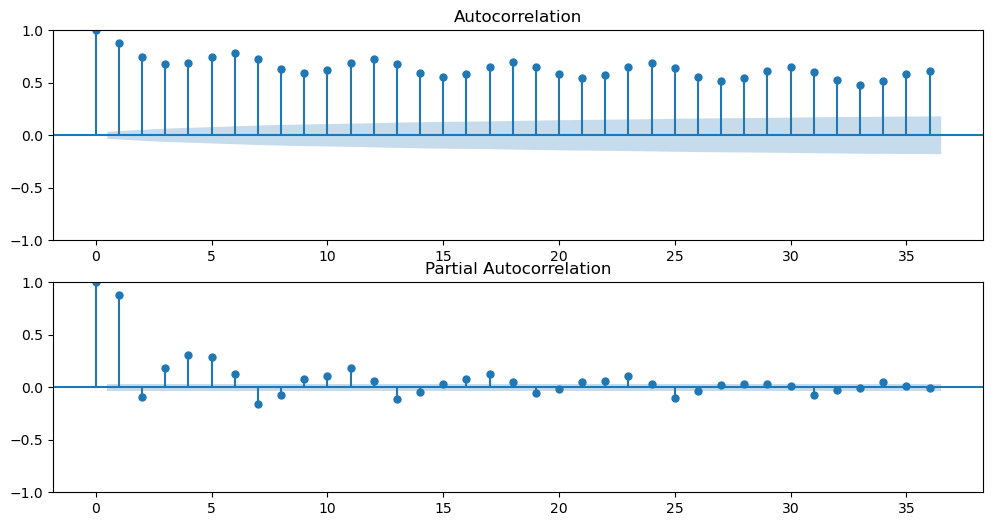

In [20]:
series2 = series[119::120]
get_acf_pacf_plots(series2)
plt.show()

data for every 31 days

/home/mike/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


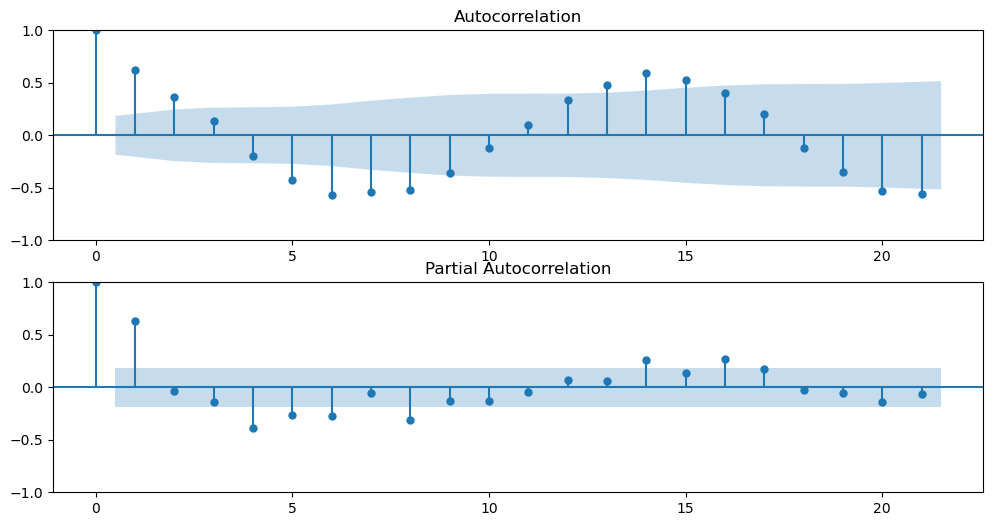

In [21]:
series2 = series2[30::31]
get_acf_pacf_plots(series2)
plt.show()

there are several points fall outside of the blue region, which indicates that the series is not stationary

# Dicket-Fuller test

Unit Root Tests test the null hypothesis that a unit root is present in an autoregressive model. the original test treats a time series as a lag-1 autoregressive model, and a unit root proves that a time series is not stationary

there are 3 main version of the test:
1. test for a unit root
2. test for a unit root with drift
3. test for a unit root drift and deterministic time trend

the `Augmented Dickey-Fuller` test is a `one-tailed` test that uses the same testing procedure, but applied to a lag-p series

In [22]:
from statsmodels.tsa.stattools import adfuller

def test_dickey_fuller_stationarity(df):
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic',
        'p-value',
        'Number of Lags used',
        'Number of observation used'
    ])

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' % key] = value 

    if dfoutput['Critical Value (1%)'] <  dfoutput['Test Statistic']:
        print('Series is not stationary with 99% confidence. ')
    elif dfoutput['Critical Value (5%)'] < dfoutput['Test Statistic']:
        print('Series is not stationary with 95% confidence. ')
    elif dfoutput['Critical Value (10%)'] < dfoutput['Test Statistic']:
        print('Series is not stationary with 90% confidence. ')
    else:
        print('Series is possibly stationary. ')
    return dfoutput

out = test_dickey_fuller_stationarity(series)
print(out)

: 

: 

# KPSS test

another unit test is the `KPSS test`. instead of assuming of null hypothesis of the presence of a unit root, the KPSS test considers it the alternative hypothesis. 